#### Background information: 
In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

#### Questions for investigation:
As a general note, be sure to keep a record of any resources that you use or refer to in the creation of your project. You will need to report your sources as part of the project submission.

Now it’s your chance to try out the Stroop task for yourself. Go to this link, which has a Java-based applet for performing the Stroop task. Record the times that you received on the task (you do not need to submit your times to the site.) Now, download this dataset which contains results from a number of participants in the task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.

Dataset: https://drive.google.com/file/d/0B9Yf01UaIbUgQXpYb2NhZ29yX1U/view
Interactive Stroop Experiment: https://faculty.washington.edu/chudler/java/ready.html

In [1]:
#import data and present it as table
import pandas
df = pandas.read_csv('stroopdata.csv')
print df

    Congruent  Incongruent
0      12.079       19.278
1      16.791       18.741
2       9.564       21.214
3       8.630       15.687
4      14.669       22.803
5      12.238       20.878
6      14.692       24.572
7       8.987       17.394
8       9.401       20.762
9      14.480       26.282
10     22.328       24.524
11     15.298       18.644
12     15.073       17.510
13     16.929       20.330
14     18.200       35.255
15     12.130       22.158
16     18.495       25.139
17     10.639       20.429
18     11.344       17.425
19     12.369       34.288
20     12.944       23.894
21     14.233       17.960
22     19.710       22.058
23     16.004       21.157


##### 1. What is our independent variable? What is our dependent variable?

The independent variable is the treatment, that can be either congruent or incongruent (congruence between the ink color and the name of the color presented). The dependent variable is how many seconds it takes to name the ink colors in equally-sized lists.

##### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

Considering it as a one tailed test, the null hypothesis is the average of seconds in the congruent treatment is equal or greater than the average of seconds in the incongruent treatment. 

The alternative hypothesis is the average of seconds in the congruent treatment is less than the average of the incongruent, meaning there is a statistical significance between the two averages. In other words, the alternative hypothesis is that it takes less time to read the list when the color's ink and name are congruent, than whey they are incongruent.

We can also state (consider M as the symbol for the population average henceforth): 

H0: Mcongruent - Mincongruent >= 0

Ha: Mcongruent - Mincongruent < 0

A one tailed test is justified because we are not considering the hypothesis of incongruent average being less than congruent average. And since these are the same sample (within-subject design), we will execute a dependent t-test for paired samples. 

##### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [2]:
df['Differences'] = df['Congruent'] - df['Incongruent']
df.describe()

,Congruent,Incongruent,Differences
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,-7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,-21.919000
25%,11.895250,18.716750,-10.258500
50%,14.356500,21.017500,-7.666500
75%,16.200750,24.051500,-3.645500
max,22.328000,35.255000,-1.950000


Above we are using a common function in pandas, describe, to present some basic descriptive statistics of the data, including measures of central tendency and measures of variability (the standard deviation is already normalized with bessel correction).

##### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

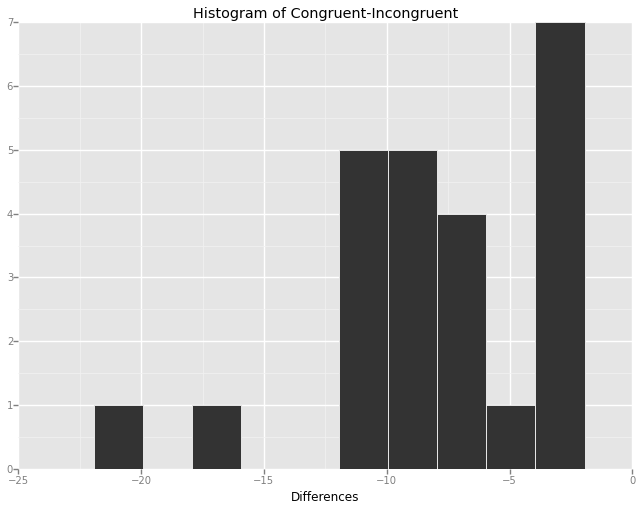

<ggplot: (281567769)>


In [3]:
%matplotlib inline
from ggplot import *
print ggplot(df, aes(x='Differences')) + geom_histogram(binwidth=2) + ggtitle('Histogram of Congruent-Incongruent')

Although there a very few data to represent an histogram, the shape seems like a bimodal distribution, negatively skewed. The two modes are around -2.5 and -10.

/Users/lucasosouza/anaconda/lib/python2.7/site-packages/ggplot/stats/stat_smooth.py:22: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  data = data.sort(['x'])
/Users/lucasosouza/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


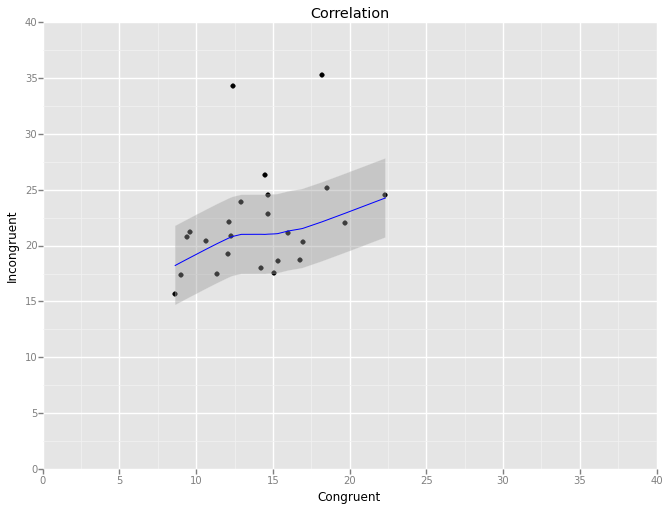

<ggplot: (274669857)>


In [4]:
#correlation graph -> looking for a trend
print ggplot(df, aes(x='Congruent', y='Incongruent')) + ggtitle('Correlation') + geom_point() \
+ stat_smooth(colour='blue', span=0.8) + xlim(0,40) + ylim(0,40)

Furthermore, let's analyse the dataset for each treatment. In the scatterplot above you can see the variables Congruent and Incongruent seem correlated. 

The graph shows a correlation between the time a person took to complete the Congruent dataset test and the Incongruent dataset test. That is expected. The trend is slightly upwards, meaning it appears to be not a fixed difference of time, rather exponential.

By fixing the x and y limits, you can also see the differences in the range - the x-values (congruent) range mostly from 10 to 23 while the y-values(incongruent) range from 15 to 27. 

It is easier to spot the difference in the range in the boxplots below. They both have similar interquartile ranges, but the incongruent boxplot is about 7 units shifted to the right in the x-axis, which is consistent with the calculated average difference.

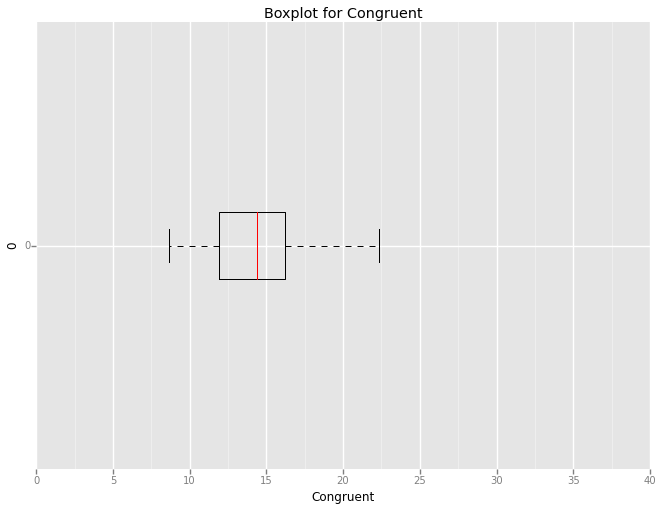

<ggplot: (274669857)>


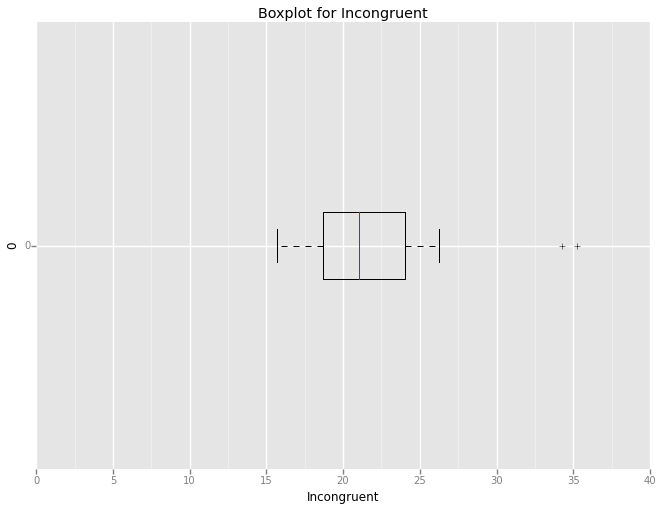

<ggplot: (273708217)>


In [5]:
print ggplot(df, aes(x='Congruent', y=0)) + geom_boxplot() + ggtitle('Boxplot for Congruent') + xlim(0,40)
print ggplot(df, aes(x='Incongruent', y=0)) + geom_boxplot() + ggtitle('Boxplot for Incongruent') + xlim(0,40)

##### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [6]:
from scipy import stats
import numpy as np

#standard error calculation
S = df['Differences'].std()
# S = df['Incongruent'].std()
X_diff = df['Differences'].mean()
print 'Mean of the differences: %f' % X_diff
print 'Standard deviation of the differences: %f' % S

#already have X_diff and S, calculate t value
n = df['Congruent'].count()
degrees_of_freedom = n-1
SEM = S/n**.5
print "Standard error of the means: %f" % SEM
t_value = X_diff/SEM
print "t-value: %f" % t_value

#get t critical
confidence_level = 0.05
t_critical = stats.t.ppf(confidence_level, degrees_of_freedom) 
print "t-critical: %f" % t_critical

#calculate p
p = stats.t.sf(np.abs(t_value), degrees_of_freedom)
print "p: %.8f" % p

#calculates margin of error and confidence interval
margin_of_error = -t_critical * SEM
print "margin of error: %f" % margin_of_error
print "confidence interval: %f, %f" % (X_diff - margin_of_error, X_diff + margin_of_error)

#calculates effect measures
r2  = t_value**2/(t_value**2+degrees_of_freedom)
cohens_d = float(X_diff)/S
print "r2: %f" % r2
print "Cohen's d: %f" % cohens_d


Mean of the differences: -7.964792
Standard deviation of the differences: 4.864827
Standard error of the means: 0.993029
t-value: -8.020707
t-critical: -1.713872
p: 0.00000002
margin of error: 1.701924
confidence interval: -9.666715, -6.262868
r2: 0.736636
Cohen's d: -1.637220


In [8]:
t = 2.069
margin_of_error = t * S
print "confidence interval: %f, %f" % (X_diff - margin_of_error, X_diff + margin_of_error)


confidence interval: -18.030119, 2.100535


The test shows that the t statistics is a lot higher than the critical statistic value, meaning t-value > t-critical and hence p < 0.05. The probability of the two distributions averages being equal or the congruent average being greater than the incongruent average is 2e-8, negligible.

Therefore we can reject the null hypothesis. There is evidence to support that the average of Congruent treatment is less than the average of the Incongruent treatment, in the overall population. With p < 0.05, or 95% confidence level, we can state the average difference between Congruent and Incongruent treatment is between -9.667 and -6.263.

The results are as expected from observing the data samples and the visualizations generated in the previous topic. The effect measure r2 shows that 73.66% of the difference between the Congruent and Incongruent means can be explained by the diference in the treatment. The Cohen's d measure shows that difference is about -1.63 in units of standard deviation.

##### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

The Stroop effect represents a classical cognitive dissonance effect, which is the effect that happens when two cognitions contradict one another. Your visual cortex conveys that the color represented is X, while your language interpretation understands the color is Y. This cognitive dissonance is the reason why it takes on average between 0.25 and 0.35 seconds more per word to resolve this dissonance and interpret the actual ink color. 